Load the necessary modules

In [80]:
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import yfinance as yf
import cvxopt as opt
from cvxopt import blas, solvers



Now let us import the data of 8 Indian Stocks from NIFTY 50 index and convert the data into dataframes

In [81]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [82]:
stock_symbols = ["INFY.NS", "HEROMOTOCO.NS", "RELIANCE.NS", "HDFC.NS", "ASIANPAINT.NS", "BHARTIARTL.NS", "SUNPHARMA.NS", "COALINDIA.NS"]
stock_names = ["Infosys", "Hero", "Reliance", "HDFC", "Asian Paints", "Airtel", "Sun Pharmaceuticals", "Coal India"]

start = datetime(2017, 11, 20)
end = datetime(2022, 11, 20)

In [83]:
stock_df = pdr.DataReader(stock_symbols,'yahoo', start, end)
stock_df.head()

Attributes   Adj Close                                                       \
Symbols        INFY.NS HEROMOTOCO.NS RELIANCE.NS      HDFC.NS ASIANPAINT.NS   
Date                                                                          
2017-11-20  423.263306   3082.720703  892.678650  1573.434448   1127.284790   
2017-11-21  425.774994   3099.699219  904.020691  1578.371460   1121.437500   
2017-11-22  425.797058   3084.995850  902.275818  1600.400635   1134.968506   
2017-11-23  436.791199   3098.520020  918.028625  1587.779053   1120.760620   
2017-11-24  444.855042   3078.212891  922.003174  1593.787231   1120.760620   

Attributes                                               Close                \
Symbols    BHARTIARTL.NS SUNPHARMA.NS COALINDIA.NS     INFY.NS HEROMOTOCO.NS   
Date                                                                           
2017-11-20    439.472443   496.347656   171.981232  480.274994   3658.600098   
2017-11-21    448.928284   516.406860   169.169983  483.125000   3678.750000   
2017-11-22    445.226196   513.719543   167.934265  483.149994   3661.300049   
2017-11-23    442.773071   522.837402   167.100159  495.625000   3677.350098   
2017-11-24    443.174438   527.396423   167.748917  504.774994   3653.250000   

Attributes                                                                    \
Symbols    RELIANCE.NS      HDFC.NS ASIANPAINT.NS BHARTIARTL.NS SUNPHARMA.NS   
Date                                                                           
2017-11-20  912.203247  1689.199951   1166.349976    452.340576   517.150024   
2017-11-21  923.793335  1694.500000   1160.300049    462.073273   538.049988   
2017-11-22  922.010254  1718.150024   1174.300049    458.262817   535.250000   
2017-11-23  938.107666  1704.599976   1159.599976    455.737823   544.750000   
2017-11-24  942.169189  1711.050049   1159.599976    456.151001   549.500000   

Attributes                     High                                         \
Symbols    COALINDIA.NS     INFY.NS HEROMOTOCO.NS RELIANCE.NS      HDFC.NS   
Date                                                                         
2017-11-20   278.350006  485.500000   3689.000000  915.670349  1706.750000   
2017-11-21   273.799988  485.750000   3690.500000  930.826721  1706.000000   
2017-11-22   271.799988  485.524994   3710.000000  929.836060  1724.949951   
2017-11-23   270.450012  497.225006   3698.350098  940.980469  1720.949951   
2017-11-24   271.500000  509.649994   3690.149902  950.490295  1715.000000   

Attributes                                                               Low  \
Symbols    ASIANPAINT.NS BHARTIARTL.NS SUNPHARMA.NS COALINDIA.NS     INFY.NS   
Date                                                                           
2017-11-20   1176.449951    456.059204   521.849976   280.250000  478.625000   
2017-11-21   1175.000000    467.582336   541.500000   282.000000  480.024994   
2017-11-22   1176.500000    465.975525   544.650024   276.500000  481.649994   
2017-11-23   1177.900024    465.516449   547.500000   274.100006  484.500000   
2017-11-24   1164.000000    460.236908   551.000000   272.850006  495.100006   

Attributes                                                                     \
Symbols    HEROMOTOCO.NS RELIANCE.NS      HDFC.NS ASIANPAINT.NS BHARTIARTL.NS   
Date                                                                            
2017-11-20   3618.000000  896.502075  1685.000000   1159.650024    448.989227   
2017-11-21   3664.899902  916.809570  1687.000000   1156.000000    454.039215   
2017-11-22   3645.199951  914.778809  1692.750000   1155.000000    454.911469   
2017-11-23   3645.500000  917.948792  1700.650024   1157.050049    453.121033   
2017-11-24   3650.000000  938.503906  1697.099976   1148.150024    454.498291   

Attributes                                  Open                            \
Symbols    SUNPHARMA.NS COALINDIA.NS     INFY.NS HEROMOTOCO.NS RELIANCE.NS   
Date          

Transforming the data set to only take the 'Adj Clos' prices

In [84]:
stock_adj_close = stock_df['Adj Close']
stock_adj_close.head()

Symbols,INFY.NS,HEROMOTOCO.NS,RELIANCE.NS,HDFC.NS,ASIANPAINT.NS,BHARTIARTL.NS,SUNPHARMA.NS,COALINDIA.NS
Date,,,,,,,,
2017-11-20,423.263306,3082.720703,892.678650,1573.434448,1127.284790,439.472443,496.347656,171.981232
2017-11-21,425.774994,3099.699219,904.020691,1578.371460,1121.437500,448.928284,516.406860,169.169983
2017-11-22,425.797058,3084.995850,902.275818,1600.400635,1134.968506,445.226196,513.719543,167.934265
2017-11-23,436.791199,3098.520020,918.028625,1587.779053,1120.760620,442.773071,522.837402,167.100159
2017-11-24,444.855042,3078.212891,922.003174,1593.787231,1120.760620,443.174438,527.396423,167.748917


Plotting the stock price over time

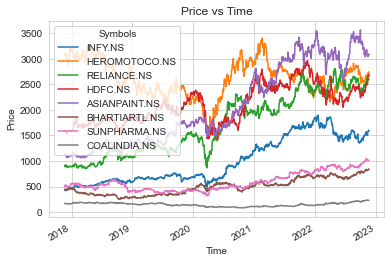

<Figure size 432x288 with 0 Axes>

In [85]:
sns.set_style('whitegrid')
stock_adj_close.plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price vs Time')
plt.show()
plt.clf()

Calculating and plotting Rate of Return over time

In [86]:
stock_ror = stock_adj_close.pct_change()
stock_ror.head()

Symbols,INFY.NS,HEROMOTOCO.NS,RELIANCE.NS,HDFC.NS,ASIANPAINT.NS,BHARTIARTL.NS,SUNPHARMA.NS,COALINDIA.NS
Date,,,,,,,,
2017-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-21,0.005934,0.005508,0.012706,0.003138,-0.005187,0.021516,0.040414,-0.016346
2017-11-22,0.000052,-0.004743,-0.001930,0.013957,0.012066,-0.008247,-0.005204,-0.007305
2017-11-23,0.025820,0.004384,0.017459,-0.007887,-0.012518,-0.005510,0.017749,-0.004967
2017-11-24,0.018462,-0.006554,0.004329,0.003784,0.000000,0.000906,0.008720,0.003882


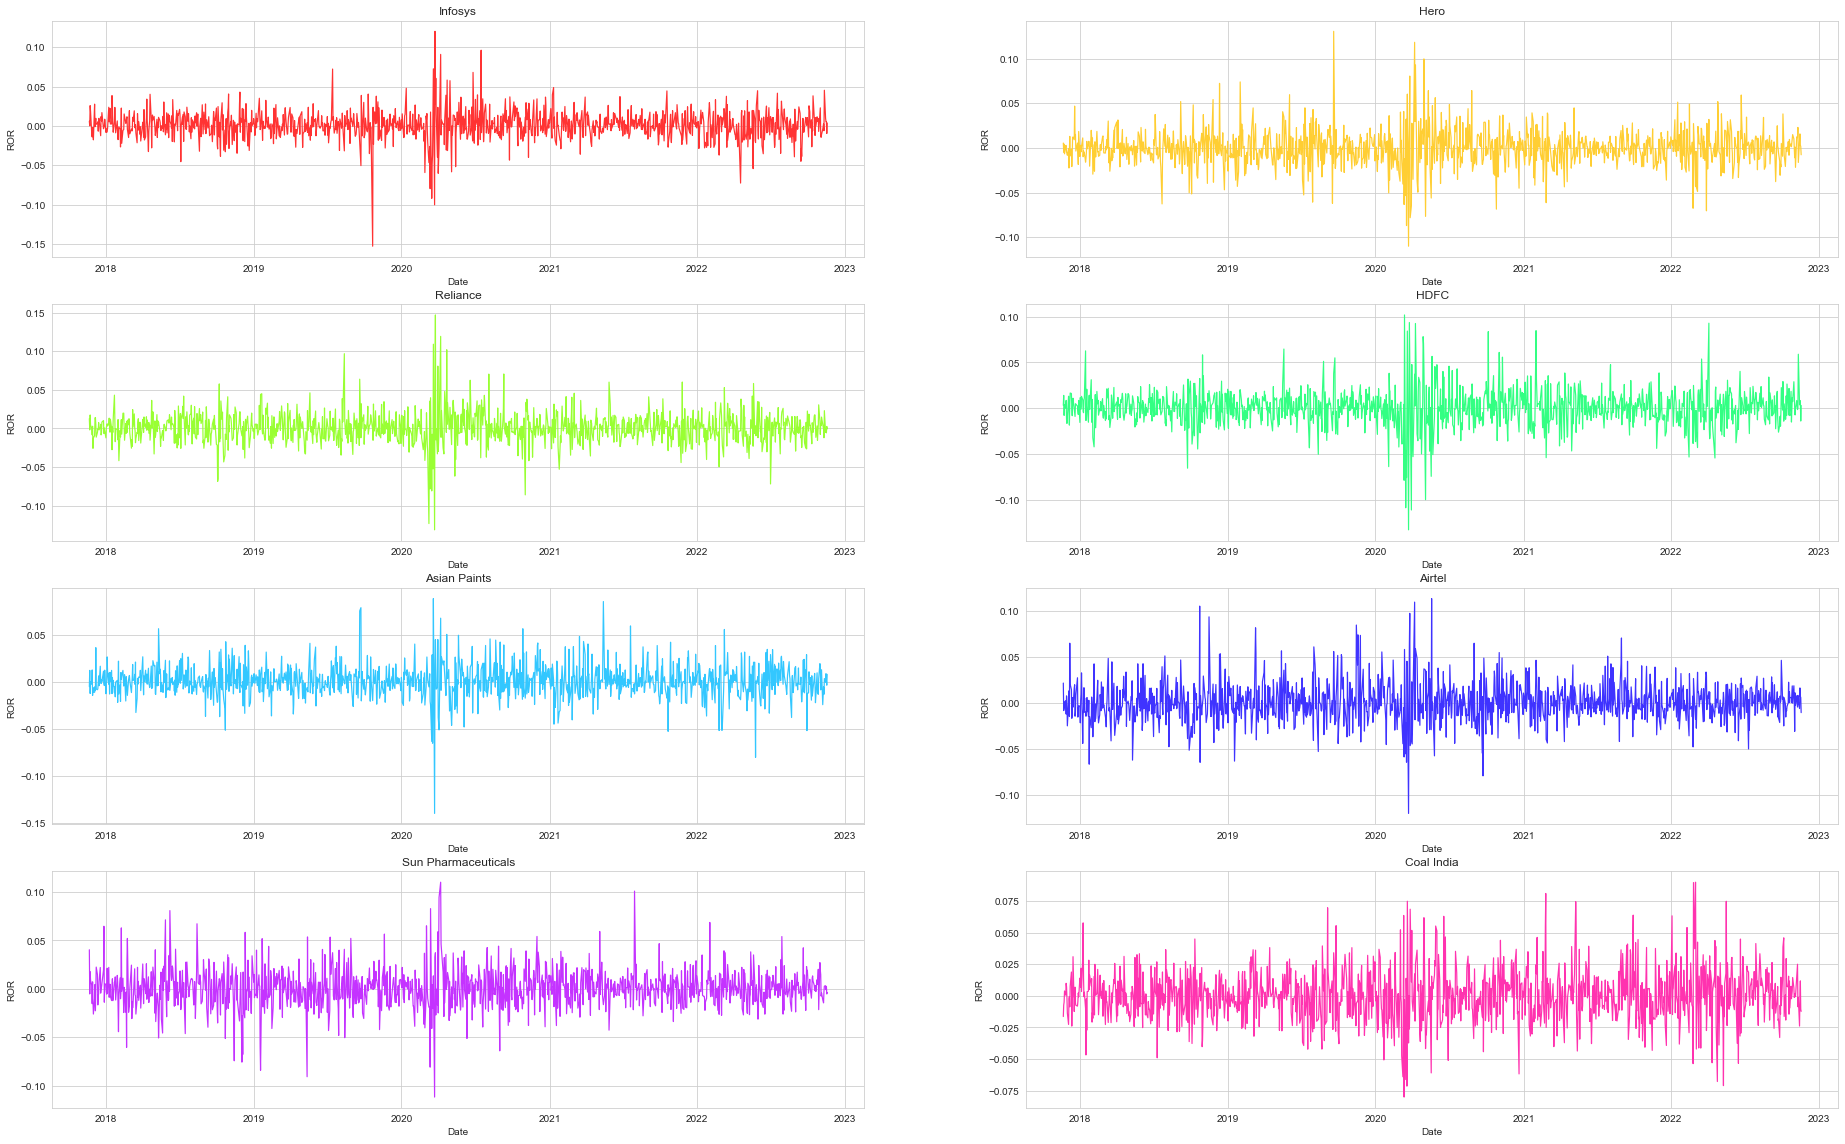

In [87]:
fig = plt.figure(figsize=(32,20))
sp1 = fig.add_subplot(4,2,1)
sp2 = fig.add_subplot(4,2,2)
sp3 = fig.add_subplot(4,2,3)
sp4 = fig.add_subplot(4,2,4)
sp5 = fig.add_subplot(4,2,5)
sp6 = fig.add_subplot(4,2,6)
sp7 = fig.add_subplot(4,2,7)
sp8 = fig.add_subplot(4,2,8)

stock_names = ["Infosys", "Hero", "Reliance", "HDFC", "Asian Paints", "Airtel", "Sun Pharmaceuticals", "Coal India"]

sp1.plot(stock_ror['INFY.NS'], linewidth= 1.2, color = '#ff3333')
sp1.set_title("Infosys")
sp1.set_ylabel("ROR")
sp1.set_xlabel("Date")

sp2.plot(stock_ror['HEROMOTOCO.NS'], linewidth= 1.2, color = '#ffce33')
sp2.set_title("Hero")
sp2.set_ylabel("ROR")
sp2.set_xlabel("Date")

sp3.plot(stock_ror['RELIANCE.NS'], linewidth= 1.2, color = '#99ff33')
sp3.set_title("Reliance")
sp3.set_ylabel("ROR")
sp3.set_xlabel("Date")

sp4.plot(stock_ror['HDFC.NS'], linewidth= 1.2, color = '#33ff83')
sp4.set_title("HDFC")
sp4.set_ylabel("ROR")
sp4.set_xlabel("Date")

sp5.plot(stock_ror['ASIANPAINT.NS'], linewidth= 1.2, color = '#33c7ff')
sp5.set_title("Asian Paints")
sp5.set_ylabel("ROR")
sp5.set_xlabel("Date")

sp6.plot(stock_ror['BHARTIARTL.NS'], linewidth= 1.2, color = '#3f33ff')
sp6.set_title("Airtel")
sp6.set_ylabel("ROR")
sp6.set_xlabel("Date")

sp7.plot(stock_ror['SUNPHARMA.NS'], linewidth= 1.2, color = '#c433ff')
sp7.set_title("Sun Pharmaceuticals")
sp7.set_ylabel("ROR")
sp7.set_xlabel("Date")

sp8.plot(stock_ror['COALINDIA.NS'], linewidth= 1.2, color = '#ff33af')
sp8.set_title("Coal India")
sp8.set_ylabel("ROR")
sp8.set_xlabel("Date")

plt.show()

Finding the mean, variance, correlation and covariance for each stock

In [88]:
mean_stock_ror = stock_ror.mean()
mean_stock_ror

Symbols
INFY.NS          0.001240
HEROMOTOCO.NS    0.000096
RELIANCE.NS      0.001064
HDFC.NS          0.000628
ASIANPAINT.NS    0.000967
BHARTIARTL.NS    0.000749
SUNPHARMA.NS     0.000775
COALINDIA.NS     0.000438
dtype: float64

In [89]:
var_stock_ror = stock_ror.var()
var_stock_ror

Symbols
INFY.NS          0.000328
HEROMOTOCO.NS    0.000395
RELIANCE.NS      0.000398
HDFC.NS          0.000399
ASIANPAINT.NS    0.000296
BHARTIARTL.NS    0.000456
SUNPHARMA.NS     0.000400
COALINDIA.NS     0.000409
dtype: float64

In [90]:
cor_stock_ror = stock_ror.corr()
cor_stock_ror

Symbols,INFY.NS,HEROMOTOCO.NS,RELIANCE.NS,HDFC.NS,ASIANPAINT.NS,BHARTIARTL.NS,SUNPHARMA.NS,COALINDIA.NS
Symbols,,,,,,,,
INFY.NS,1.000000,0.235005,0.297815,0.324194,0.257684,0.212371,0.230356,0.155699
HEROMOTOCO.NS,0.235005,1.000000,0.344406,0.381784,0.354443,0.285412,0.235853,0.265447
RELIANCE.NS,0.297815,0.344406,1.000000,0.374314,0.352715,0.287961,0.274606,0.310897
HDFC.NS,0.324194,0.381784,0.374314,1.000000,0.349633,0.330766,0.213030,0.222218
ASIANPAINT.NS,0.257684,0.354443,0.352715,0.349633,1.000000,0.255519,0.179020,0.140506
BHARTIARTL.NS,0.212371,0.285412,0.287961,0.330766,0.255519,1.000000,0.233948,0.177778
SUNPHARMA.NS,0.230356,0.235853,0.274606,0.213030,0.179020,0.233948,1.000000,0.236608
COALINDIA.NS,0.155699,0.265447,0.310897,0.222218,0.140506,0.177778,0.236608,1.000000


Lets try to look at the correlation heat map

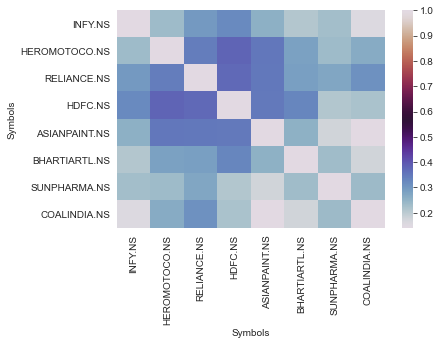

In [91]:
sns.heatmap(cor_stock_ror, cmap= 'twilight')
plt.show()

In [92]:
cov_stock_ror = stock_ror.cov()
cov_stock_ror

Symbols,INFY.NS,HEROMOTOCO.NS,RELIANCE.NS,HDFC.NS,ASIANPAINT.NS,BHARTIARTL.NS,SUNPHARMA.NS,COALINDIA.NS
Symbols,,,,,,,,
INFY.NS,0.000328,0.000085,0.000108,0.000117,0.000080,0.000082,0.000083,0.000057
HEROMOTOCO.NS,0.000085,0.000395,0.000136,0.000152,0.000121,0.000121,0.000094,0.000107
RELIANCE.NS,0.000108,0.000136,0.000398,0.000149,0.000121,0.000123,0.000110,0.000125
HDFC.NS,0.000117,0.000152,0.000149,0.000399,0.000120,0.000141,0.000085,0.000090
ASIANPAINT.NS,0.000080,0.000121,0.000121,0.000120,0.000296,0.000094,0.000062,0.000049
BHARTIARTL.NS,0.000082,0.000121,0.000123,0.000141,0.000094,0.000456,0.000100,0.000077
SUNPHARMA.NS,0.000083,0.000094,0.000110,0.000085,0.000062,0.000100,0.000400,0.000096
COALINDIA.NS,0.000057,0.000107,0.000125,0.000090,0.000049,0.000077,0.000096,0.000409


Now using the Mean-Variance Optimization method, we can find the best portfolio to choose

Return Portfolio function from Codecademy course

In [93]:
def return_portfolios(expected_returns, cov_matrix):
    np.random.seed(1)
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
        portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df

Optimal Portfolio function from the Codecademy Course

In [94]:
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 10
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

Generating 5000 random portfolios to choose one, closest to the optimal portfolio

In [95]:
random_portfolios = return_portfolios(mean_stock_ror, cov_stock_ror)
random_portfolios.head()

,Returns,Volatility,INFY.NS Weight,HEROMOTOCO.NS Weight,RELIANCE.NS Weight,HDFC.NS Weight,ASIANPAINT.NS Weight,BHARTIARTL.NS Weight,SUNPHARMA.NS Weight,COALINDIA.NS Weight
0,0.000580,0.012487,0.188637,0.325834,0.000052,0.136758,0.066384,0.041769,0.084254,0.156312
1,0.000678,0.012583,0.103854,0.141036,0.109725,0.179357,0.053516,0.229848,0.007169,0.175496
2,0.000707,0.011928,0.102050,0.136625,0.034331,0.048445,0.195818,0.236783,0.076646,0.169304
3,0.000684,0.012572,0.253107,0.258368,0.024561,0.011279,0.049048,0.253614,0.028403,0.121619
4,0.000795,0.011951,0.200060,0.111354,0.144502,0.065897,0.143379,0.174316,0.003820,0.156672


In [96]:
weights, returns, risks = optimal_portfolio(stock_ror[1:])

     pcost       dcost       gap    pres   dres
 0: -7.3856e-04 -1.0012e+00  1e+00  1e-16  3e+00
 1: -7.3879e-04 -1.1235e-02  1e-02  5e-17  3e-02
 2: -7.5926e-04 -1.3344e-03  6e-04  3e-17  2e-03
 3: -1.1971e-03 -1.4617e-03  3e-04  2e-16  3e-04
 4: -1.2164e-03 -1.2256e-03  9e-06  2e-16  9e-06
 5: -1.2231e-03 -1.2232e-03  9e-08  3e-18  9e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2362e-04 -1.0012e+00  1e+00  0e+00  3e+00
 1: -7.2385e-04 -1.1224e-02  1e-02  6e-17  3e-02
 2: -7.4441e-04 -1.3231e-03  6e-04  8e-17  2e-03
 3: -1.1638e-03 -1.4373e-03  3e-04  2e-16  2e-04
 4: -1.1796e-03 -1.1903e-03  1e-05  2e-16  7e-06
 5: -1.1875e-03 -1.1877e-03  2e-07  5e-18  8e-08
 6: -1.1877e-03 -1.1877e-03  2e-09  2e-16  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.7636e-04 -1.0012e+00  1e+00  2e-16  3e+00
 1: -6.7660e-04 -1.1191e-02  1e-02  7e-17  3e-02
 2: -6.9751e-04 -1.2875e-03  6e-04  1e-16  2e-03
 3: -1.0544e-03 -1.3452e

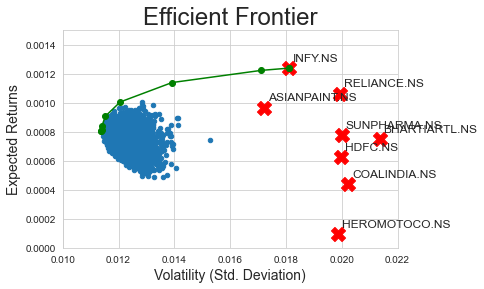

In [106]:
single_asset_std = np.sqrt(np.diagonal(cov_stock_ror))

random_portfolios.plot.scatter(x='Volatility', y='Returns')
plt.plot(risks,returns, 'g-o')
plt.scatter(single_asset_std, mean_stock_ror, marker='X',color='red',s=200)
plt.axis([0.01, 0.022, 0, 0.0015])    
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
for i, txt in enumerate(stock_ror.keys()):
    plt.annotate(txt, (single_asset_std[i], mean_stock_ror[i]), size=12, xytext=(4,7), ha='left', textcoords='offset points')
plt.show()

Calculating the Minimum and Maximum Volatility and Returns

In [109]:
min_volatility = random_portfolios.Volatility.min()
max_volatility = random_portfolios.Volatility.max()
print(min_volatility,max_volatility)

0.01144143707261646 0.015287173330524961


In [110]:
min_returns = random_portfolios.Returns.min()
max_returns = random_portfolios.Returns.max()
print(min_returns,max_returns)

0.0004899703699025948 0.0010050636656810284


Using this data, we can come to three options:

1. Minimum Risk

In [113]:
portfolio_min_volatility = [random_portfolios.iloc[[i]] for i in range(5000) if (random_portfolios.Volatility[i] == min_volatility) and (random_portfolios.Returns[i] > min_returns)]

len(portfolio_min_volatility)

1

In [115]:
portfolio_min_volatility[0]

,Returns,Volatility,INFY.NS Weight,HEROMOTOCO.NS Weight,RELIANCE.NS Weight,HDFC.NS Weight,ASIANPAINT.NS Weight,BHARTIARTL.NS Weight,SUNPHARMA.NS Weight,COALINDIA.NS Weight
217,0.000821,0.011441,0.217028,0.094322,0.064118,0.009042,0.21525,0.101108,0.159764,0.139368


2. Maximum Return

In [116]:

portfolio_max_return = [random_portfolios.iloc[[i]] for i in range(5000) if (random_portfolios.Volatility[i] > min_volatility) and (random_portfolios.Returns[i] == max_returns)]
len(portfolio_max_return)

1

In [117]:
portfolio_max_return[0]

,Returns,Volatility,INFY.NS Weight,HEROMOTOCO.NS Weight,RELIANCE.NS Weight,HDFC.NS Weight,ASIANPAINT.NS Weight,BHARTIARTL.NS Weight,SUNPHARMA.NS Weight,COALINDIA.NS Weight
1854,0.001005,0.012828,0.466547,0.050629,0.171297,0.044536,0.115653,0.08311,0.02285,0.045377


3.Medium Risk and Return

In [118]:
portfolio_medium_return = [random_portfolios.iloc[[i]] for i in range(5000) if (random_portfolios.Volatility[i] < 0.0153) and (random_portfolios.Returns[i] > 0.001)]
len(portfolio_medium_return)

1

In [120]:
portfolio_medium_return[0]

,Returns,Volatility,INFY.NS Weight,HEROMOTOCO.NS Weight,RELIANCE.NS Weight,HDFC.NS Weight,ASIANPAINT.NS Weight,BHARTIARTL.NS Weight,SUNPHARMA.NS Weight,COALINDIA.NS Weight
1854,0.001005,0.012828,0.466547,0.050629,0.171297,0.044536,0.115653,0.08311,0.02285,0.045377
